In [40]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [6]:
image_path = "/home/djo/Desktop/self driving car/data/IMG/center_2018_09_15_17_44_14_685.jpg"

In [7]:
image = mpimg.imread(image_path)

In [20]:
image.shape

(160, 320, 3)

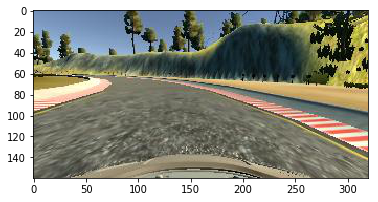

In [14]:
plt.imshow(image)

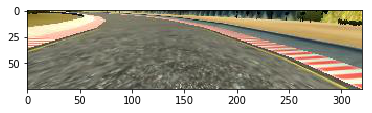

In [16]:
cropped = image[60:-25, :, :]
plt.imshow(cropped)

In [36]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3


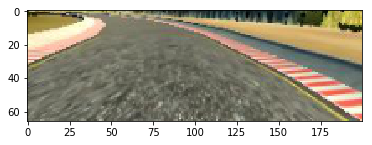

In [37]:
plt.imshow(cv2.resize(cropped, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA))
# plt.imshow(image_resized)

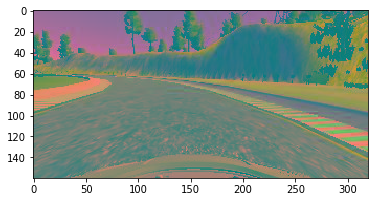

In [24]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2YUV))

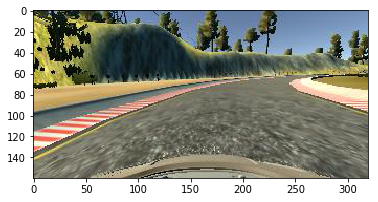

In [38]:
plt.imshow(cv2.flip(image, 1))

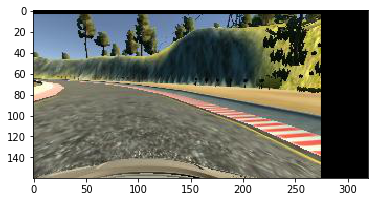

In [42]:
trans_x = 100 * (np.random.rand() - 0.5)
trans_y = 10 * (np.random.rand() - 0.5)
trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
height, width = image.shape[:2]
translated = cv2.warpAffine(image, trans_m, (width, height))
plt.imshow(translated)

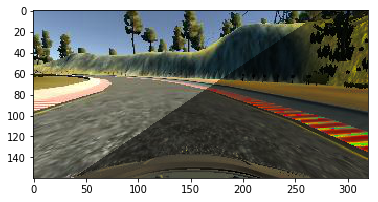

In [72]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 160, 320, 3

x1, y1 = IMAGE_WIDTH * np.random.rand(), 0
x2, y2 = IMAGE_WIDTH * np.random.rand(), IMAGE_HEIGHT
xm, ym = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]

# mathematically speaking, we want to set 1 below the line and zero otherwise
# Our coordinate is up side down.  So, the above the line: 
# (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
# as x2 == x1 causes zero-division problem, we'll write it in the below form:
# (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
mask = np.zeros_like(image[:, :, 1])
mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

# choose which side should have shadow and adjust saturation
cond = mask == np.random.randint(2)
s_ratio = np.random.uniform(low=0.2, high=0.5)

# adjust Saturation in HLS(Hue, Light, Saturation)
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
random_shadow = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)

plt.imshow(random_shadow)

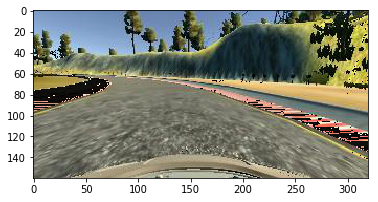

In [84]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
hsv[:,:,2] =  hsv[:,:,2] * ratio
random_brightness =  cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(random_brightness)